In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('dataset.csv')
df.head(5)

,Core_Series,Generation,Model,Rating,Date,Location,Reviews,Sentiment
0,i7,97,Core i7-9700K,5.0,2019-07-16,India,Pure beast chip.upgrade 8700k to 9700k.also go...,1
1,i7,12,Core i7-12700K Desktop,5.0,2022-03-29,India,I have paired this processor with Asus Prime Z...,1
2,i3,10,Core i3-10100,5.0,2021-05-22,India,Very safe packaging and good performance,1
3,i5,11,Core i5-11600KF Desktop,4.0,2022-11-19,the United States,Was able to snag this for about $150 before ta...,1
4,i3,12,Core i3 12100F 12th Gen Generation Desktop PC,1.0,2023-04-26,India,Cpu stock cooler fan got broken with 1 blade i...,0


In [14]:
# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46443 entries, 2019-07-16 to 2021-05-22
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Core_Series  46443 non-null  object 
 1   Generation   46443 non-null  int64  
 2   Model        46443 non-null  object 
 3   Rating       46443 non-null  float64
 4   Location     46443 non-null  object 
 5   Reviews      46443 non-null  object 
 6   Sentiment    46443 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.8+ MB
None
Core_Series    0
Generation     0
Model          0
Rating         0
Location       0
Reviews        0
Sentiment      0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12308\1472462024.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Generation', y='Rating', data=df, ci=None)


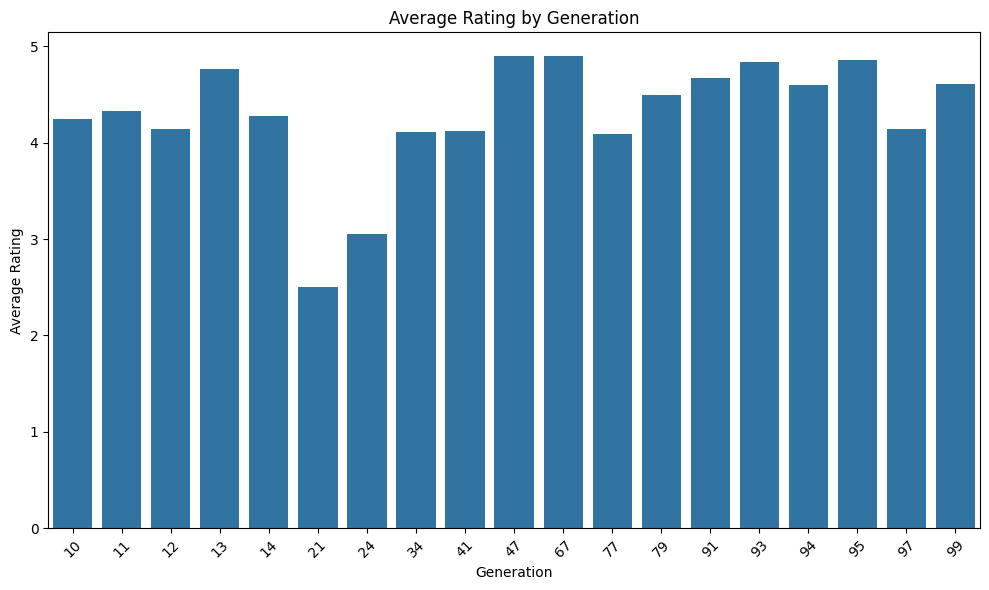

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Generation', y='Rating', data=df, ci=None)
plt.title('Average Rating by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


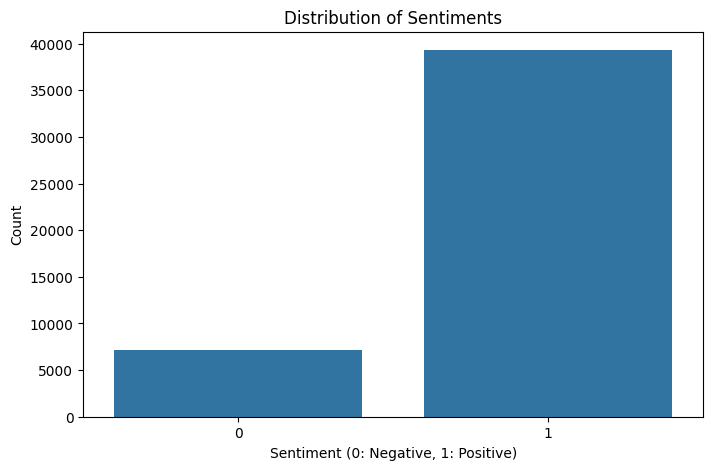

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()


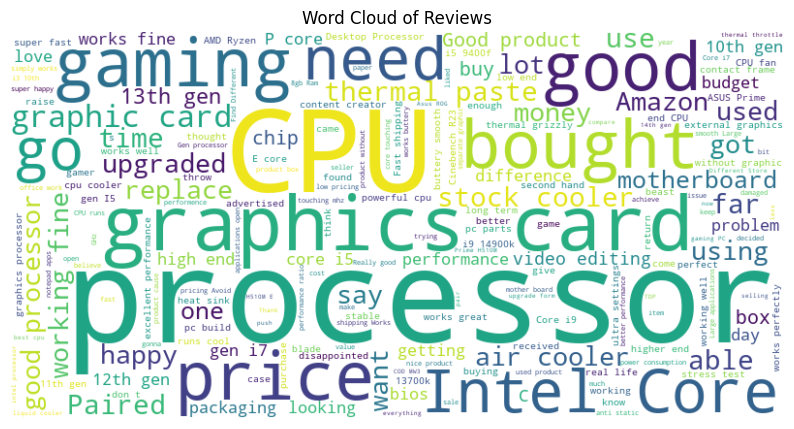

In [9]:
# Word cloud for Reviews
from wordcloud import WordCloud

reviews_text = ' '.join(df['Reviews'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

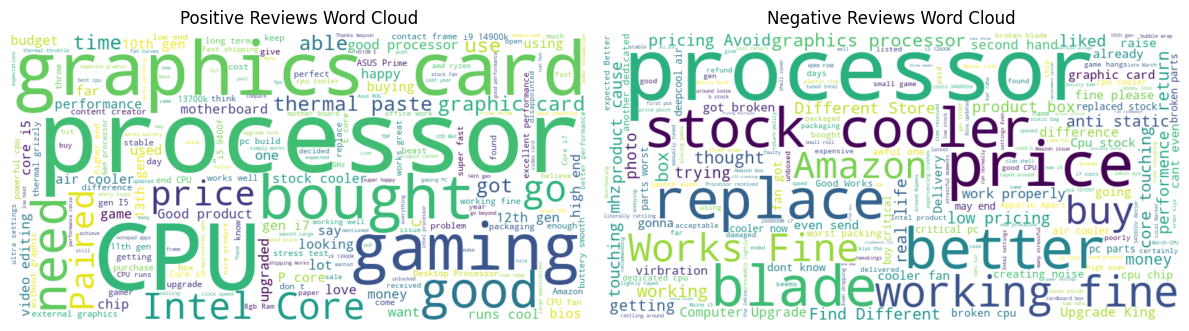

In [17]:
# Combine all reviews for positive and negative sentiments
positive_reviews = ' '.join(df[df['Sentiment'] == 1]['Reviews'])
negative_reviews = ' '.join(df[df['Sentiment'] == 0]['Reviews'])

# Create word clouds
positive_cloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_cloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_cloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_cloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()


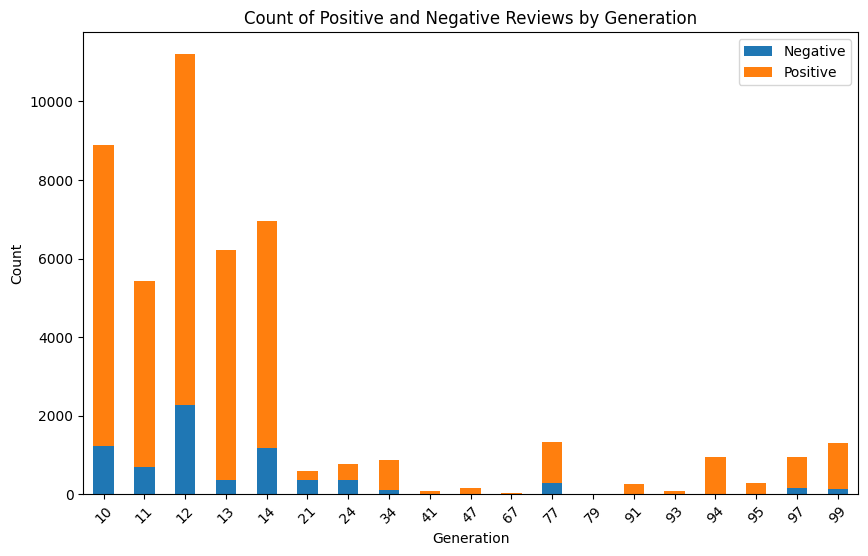

In [18]:
generation_counts = df.groupby('Generation')['Sentiment'].value_counts().unstack().fillna(0)

# Plot stacked bar chart
generation_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Positive and Negative Reviews by Generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Negative', 'Positive'], loc='upper right')
plt.show()


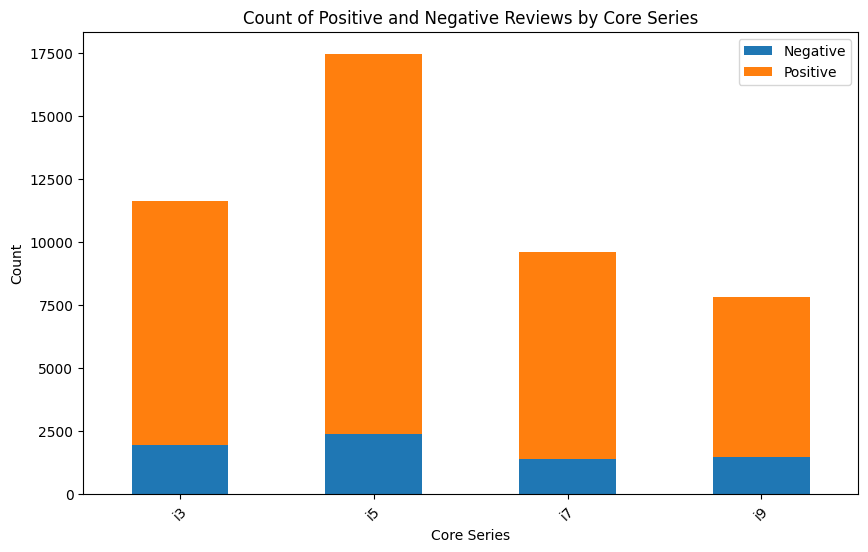

In [19]:
series_counts = df.groupby('Core_Series')['Sentiment'].value_counts().unstack().fillna(0)

# Plot stacked bar chart
series_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Positive and Negative Reviews by Core Series')
plt.xlabel('Core Series')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Negative', 'Positive'], loc='upper right')
plt.show()


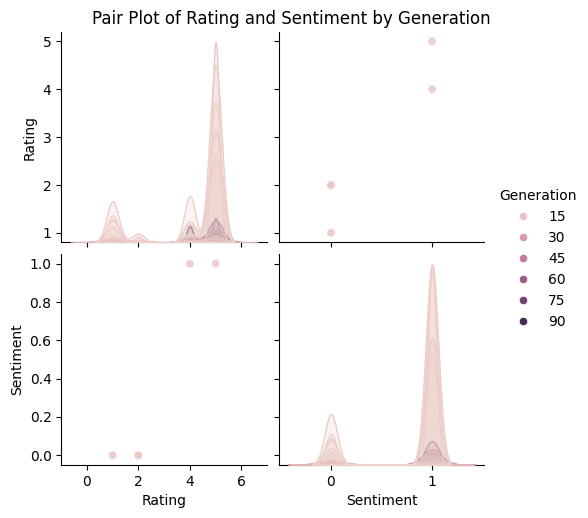

In [23]:
# Pair plot
sns.pairplot(df, vars=['Rating', 'Sentiment'], hue='Generation')
plt.suptitle('Pair Plot of Rating and Sentiment by Generation', y=1.02)
plt.show()


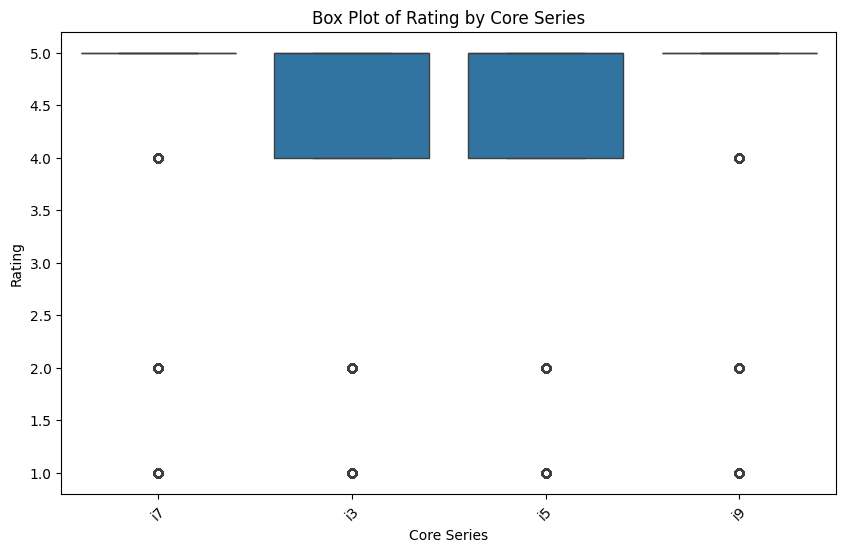

In [24]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Core_Series', y='Rating', data=df)
plt.title('Box Plot of Rating by Core Series')
plt.xlabel('Core Series')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


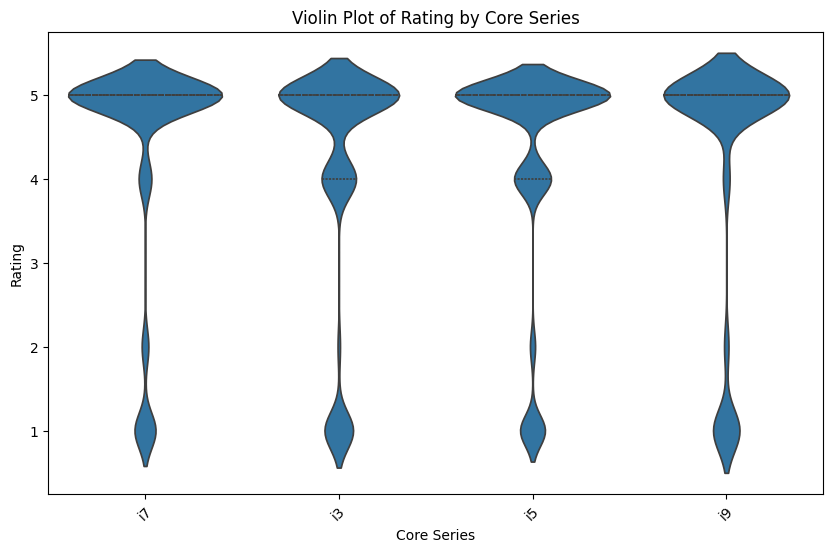

In [25]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Core_Series', y='Rating', data=df, inner='quartile')
plt.title('Violin Plot of Rating by Core Series')
plt.xlabel('Core Series')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()
